In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

In [4]:
x,y=make_classification(n_samples=500,n_features=5,n_classes=2,random_state=42)
feature_names=['Age','Cholestrol','BloodPressure','MaxHeartRate','ST_Depression']
df=pd.DataFrame(x,columns=feature_names)
df['HeartDisease']=y
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
        Age  Cholestrol  BloodPressure  MaxHeartRate  ST_Depression  \
0  1.393097   -0.968344      -0.381594     -1.258335      -2.613271   
1 -0.940149    1.190646       0.186841      0.377961       1.021012   
2  0.695495    0.927840       0.062873      1.061077       1.357341   
3 -1.352234   -1.484898       0.200687      0.089946       0.753625   
4  1.010624   -0.209023      -0.007811      0.880669       0.930456   

   HeartDisease  
0             1  
1             0  
2             1  
3             0  
4             1  


In [6]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['HeartDisease']),df["HeartDisease"],test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred_logistic=logistic_model.predict(x_test)
print("\nLogistic Regression Redults:")
print("Accuracy:",accuracy_score(y_test,y_pred_logistic))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_logistic))
print("classification Report:\n",classification_report(y_test,y_pred_logistic))


Logistic Regression Redults:
Accuracy: 0.89
Confusion Matrix:
 [[46  7]
 [ 4 43]]
classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.86      0.91      0.89        47

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [12]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
y_pred_nb=nb_model.predict(x_test)
print("\nNaive Bayes Classifier. Redults:")
print("Accuracy:",accuracy_score(y_test,y_pred_nb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_nb))
print("classification Report:\n",classification_report(y_test,y_pred_nb))


Naive Bayes Classifier. Redults:
Accuracy: 0.92
Confusion Matrix:
 [[49  4]
 [ 4 43]]
classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.91      0.91      0.91        47

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [15]:
y_prob_logistic=logistic_model.predict_proba(x_test)[:,1]
y_prob_nb=nb_model.predict_proba(x_test)[:,1]
fpr_logistic,tpr_logistic,_=roc_curve(y_test,y_prob_logistic)
fpr_nb,tpr_nb,_=roc_curve(y_test,y_prob_nb)
roc_auc_logistic=auc(fpr_logistic,tpr_logistic)
roc_auc_nb=auc(fpr_nb,tpr_nb)

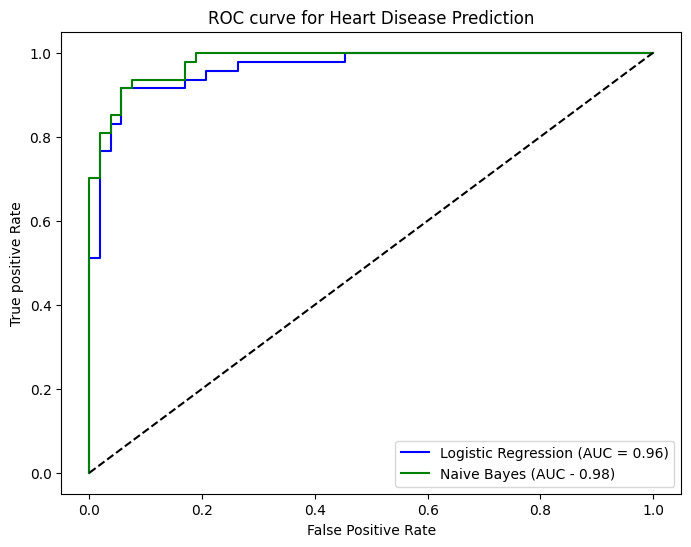

In [16]:
plt.figure(figsize=(8,6))
plt.plot(fpr_logistic,tpr_logistic,label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})',color='blue')
plt.plot(fpr_nb,tpr_nb,label=f'Naive Bayes (AUC - {roc_auc_nb:.2f})',color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title('ROC curve for Heart Disease Prediction')
plt.legend()
plt.show()